In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score 
import pickle
import joblib

df=pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
df.tail()

,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
1107,1108,51583,1108,51583,SBL,SBL_0051583,1,3.899774,1.697271,3.465151,3.31883,0.096813,5.434540
1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2.757735,1.073076,7.633618,3.30937,0.104817,4.516250
1109,1110,51585,1110,51585,SBL,SBL_0051585,1,3.413469,1.358238,4.335700,3.32455,0.109490,4.933960
1110,1111,51606,1111,51606,MAX_MUN,MaxMun_a_0051606,1,7.839007,1.754363,12.270055,3.23217,0.083964,16.403174
1111,1112,51607,1112,51607,MAX_MUN,MaxMun_a_0051607,1,12.169297,2.818352,9.272107,3.51019,0.044310,23.565982


In [2]:
np.isnan(df.values.any()) 

False

In [3]:
X_features = np.load("features.npz")['a']
y_target = np.load("labels.npz")['a']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_target, test_size=0.20, random_state = 42, shuffle = True, # shuffle dataset
stratify = y_target)

In [4]:
model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(Xtrain,ytrain)

y_pred=model.predict(Xtest)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [5]:
print("Train Accuracy:",model.score(Xtrain, ytrain))
print("Test Accuracy:", model.score(Xtest, ytest))

Train Accuracy: 0.9985632183908046
Test Accuracy: 0.6


In [6]:
from sklearn import metrics

#Classification accuracy
print(metrics.classification_report(ytest, model.predict(Xtest)))

print(accuracy_score(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           1       0.58      0.51      0.54        81
           2       0.62      0.68      0.65        94

    accuracy                           0.60       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.60      0.60      0.60       175

0.6


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


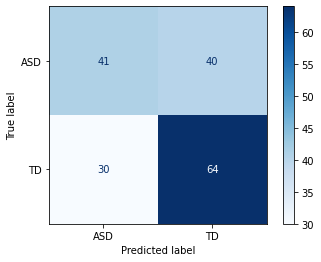

In [7]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      Xtest, ytest,
                      values_format='d',
                      display_labels=["ASD","TD"], cmap="Blues")

In [8]:
from sklearn.model_selection import KFold, cross_val_score 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, Xtest, ytest, cv = k_folds) 
print("Average CV Score: ", scores.mean())

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Average CV Score:  0.5428571428571429


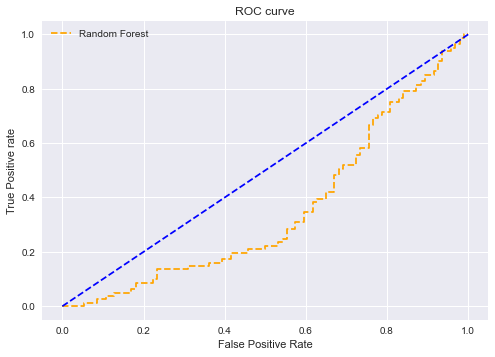

In [9]:
# predict probabilities

pred_prob = model.predict_proba(Xtest)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();